# 线性回归的简单实现
> 这里使用了torch自带的data包，来帮助我们抽取训练集数据自己制作Loader

* 其余的部分和昨天写的代码是基本相同的

In [15]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


num_examples = 1000
num_inputs =  2 
true_w = torch.tensor(np.array([2,3]),dtype=torch.float32).clone().view(2,1)
true_b = 4
features = torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)),dtype = torch.float32)
labels = torch.mm(features,true_w)+true_b+torch.tensor(np.random.normal(0,0.01,size=(1000,1)),dtype=torch.float32)
features,labels.size()

(tensor([[ 0.1090, -0.7990],
         [-1.5397, -0.0902],
         [-0.2355,  0.1363],
         ...,
         [ 1.0505, -0.1743],
         [ 1.2538, -0.7957],
         [ 0.8511, -0.9283]]), torch.Size([1000, 1]))

In [16]:
import torch.utils.data as Data
batch_size = 10
dataset = Data.TensorDataset(features,labels)
data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)


tensor([[ 0.6790, -0.5382],
        [ 0.9148,  1.0284],
        [ 0.8683,  0.3149],
        [ 1.2538, -0.7957],
        [ 0.5847,  0.6385],
        [ 0.4353,  0.0270],
        [ 0.0356,  0.2330],
        [-1.3792,  0.5097],
        [-1.0402,  0.0773],
        [ 0.4769,  1.8397]]) tensor([[ 3.7343],
        [ 8.9253],
        [ 6.6750],
        [ 4.1297],
        [ 7.0868],
        [ 4.9688],
        [ 4.7685],
        [ 2.7705],
        [ 2.1653],
        [10.4990]])


In [18]:
import torch.nn as nn
class LinearNet(nn.Module):
  def __init__(self,n_features):
    super(LinearNet,self).__init__()
    self.linear = nn.Linear(n_features,1)#nn.Linear表示线性层
  
  def forward(self,x):
    y=self.linear(x)
    return y

net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [19]:
# 初始化参数
from torch.nn import init
init.normal_(net.linear.weight,mean=0,std=0.01)
init.constant_(net.linear.bias,val=0)


Parameter containing:
tensor([0.], requires_grad=True)

In [20]:
loss = nn.MSELoss()#均方误差
import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr=0.03)


tensor([[2.],
        [3.]]) Parameter containing:
tensor([[2.0002, 3.0000]], requires_grad=True)
4 Parameter containing:
tensor([3.9998], requires_grad=True)


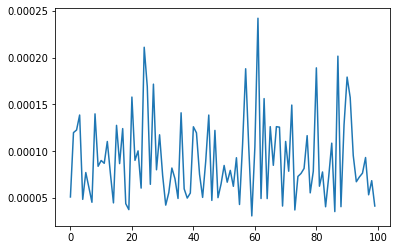

In [23]:
# 训练模型
num_epochs = 100
trainning_record = []
for epoch in range(1,num_epochs+1):
  for X,y in data_iter:
    output = net(X)
    l = loss(output,y.view(-1,1))
    optimizer.zero_grad()
    l.backward()#计算导数
    optimizer.step()#修改参数
  trainning_record.append(l.item())
plt.plot(trainning_record)

print(true_w, net.linear.weight)
print(true_b, net.linear.bias)

#小结
* 使用PyTorch可以更简洁地实现模型。
* torch.utils.data模块提供了有关数据处理的工具
* torch.nn模块定义了大量神经网络的层
* torch.nn.init模块定义了各种初始化方法
* torch.optim模块提供了很多常用的优化算法。